In [32]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [ ]:
uploaded = files.upload()

Saving webpageDataset.csv to webpageDataset.csv


In [ ]:
# Assuming the CSV file has two columns: 'url' and 'is_blog'
csv_file_path = './webpageDataset.csv'

# Step 1: Data prepare
# Create empty lists to store the data
web_pages = []
labels = []
# Read data from the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        web_pages.append(row['url'])
        labels.append(row['is_blog'])

In [ ]:
# Example usage
# Assuming we have a list of web pages and their corresponding labels
web_pages = [
    {'url': 'https://windowstoworlds.wordpress.com/index/', 'label': 'blog'},
    {'url': 'https://windowstoworlds.wordpress.com/features-and-projects/', 'label': 'blog'},
    {'url': 'https://windowstoworlds.wordpress.com/2021/05/', 'label': 'blog'},
    {'url': 'https://windowstoworlds.wordpress.com/2020/10/', 'label': 'blog'},
    {'url': 'https://windowstoworlds.wordpress.com/2020/11/', 'label': 'blog'},
    {'url': 'https://www.oyunskor.com/oyun/zuma-balon-vurma', 'label': 'non-blog'},
    {'url': 'https://www.oyunskor.com/oyun/zuma-boom', 'label': 'non-blog'},
    {'url': 'https://www.oyunskor.com/oyun/zumba-mania', 'label': 'non-blog'},
    {'url': 'https://www.oyunskor.com/oyun/zumbario', 'label': 'non-blog'},
    {'url': 'https://www.oyunskor.com/oyun/zumbie-blocky-land', 'label': 'non-blog'}
]

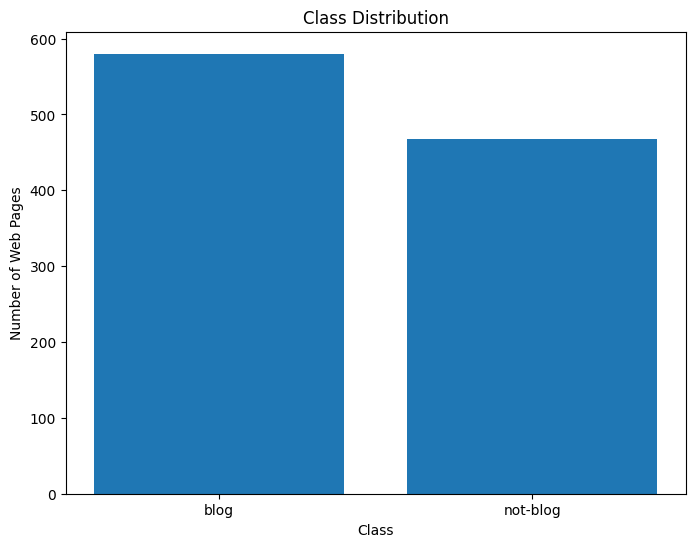

In [ ]:
# Count the number of web pages in each class
class_counts = {}
for label in labels:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Web Pages')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Step 2: Data preprocessing
# Preprocess the web page data to extract the text content
def preprocess_web_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Extract the text content from the web page
    text = soup.get_text()
    return text

In [ ]:
# Step 3: Feature extraction
# We'll use a simple bag-of-words approach using the CountVectorizer
def extract_features(text_data):
    vectorizer = CountVectorizer()
    features = vectorizer.fit_transform(text_data)
    return features

In [ ]:
# Step 4: Splitting the dataset
# Split the dataset into training and testing sets
def split_dataset(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, shuffle=True, train_size=0.8, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
# Step 5: Model training
# Train a Multinomial Naive Bayes classifier
def train_model(X_train, y_train):
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    return classifier

In [ ]:
# Step 6: Model evaluation
# Evaluate the model on the test set
def evaluate_model(classifier, X_test, y_test):
    accuracy = classifier.score(X_test, y_test)
    return accuracy

In [ ]:
# Step 7: Model deployment (example usage)
# Classify a new web page
def classify_web_page(classifier, url):
    text_data.append(preprocess_web_page(url))
    features = extract_features(text_data)
    predicted_class = classifier.predict(features[-1:])
    return predicted_class

In [ ]:
# Preprocess the web pages and extract features
text_data = []
for page in web_pages:
    text = preprocess_web_page(page)
    #text = preprocess_web_page1(page)
    text_data.append(text)
    #labels.append(page['label'])

features = extract_features(text_data)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(features, labels)
X_predict = X_train

# Train the classifier
classifier = train_model(X_train, y_train)

# Evaluate the model
accuracy = evaluate_model(classifier, X_test, y_test)

In [28]:
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


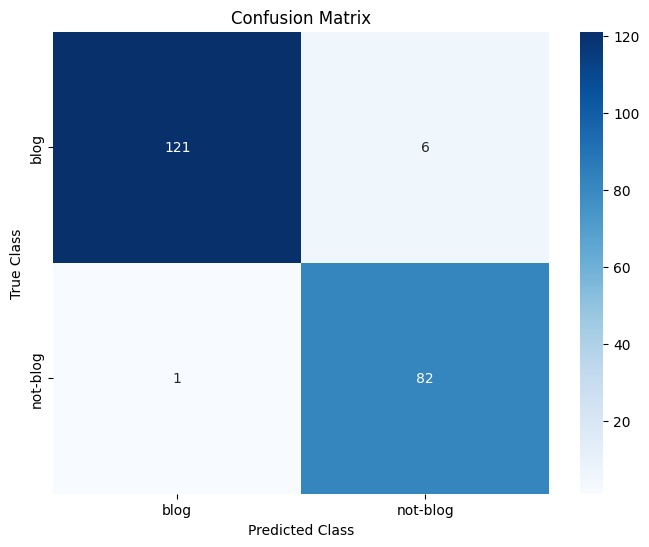

In [33]:
# Get the predicted labels for the test set
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the class labels
class_labels = np.unique(labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Classify a new web page
new_web_page = 'http://www.gameindustry.com/review/item.asp?id=294'
predicted_class = classify_web_page(classifier, new_web_page)
print("Predicted class:", predicted_class)

Predicted class: ['not-blog']
